# CMA-ES

In [1]:
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
FUNCTIONS = {
    1: {"Description": "Unimodal Function", "Optimum": 100},
    2: {"Description": "Basic Function", "Optimum": 1100},
    3: {"Description": "Basic Function", "Optimum": 700},
    4: {"Description": "Basic Function", "Optimum": 1900},
    5: {"Description": "Hybrid Function", "Optimum": 1700},
    6: {"Description": "Hybrid Function", "Optimum": 1600},
    7: {"Description": "Hybrid Function", "Optimum": 2100},
    8: {"Description": "Composition Function", "Optimum": 2200},
    9: {"Description": "Composition Function", "Optimum": 2400},
    10: {"Description": "Composition Function", "Optimum": 2500},
}

### Linear congruential

In [3]:
lcg_df = pd.read_csv('results/linear_congruential.csv')
lcg_df['Method'] = 'Linear Congruential'
lcg_df['Error'] = lcg_df.apply(
    lambda row: row['ErrorValue'] - FUNCTIONS[row['Function']]["Optimum"],
    axis=1
)

lcg_result = lcg_df.groupby(['Function', 'Dimension'])['Error'].agg([
    ('Mean Error', 'mean'),
    ('Std Error', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Num_Runs', 'count')
]).reset_index()

lcg_result['CV'] = lcg_result['Std Error'] / lcg_result['Mean Error']
lcg_result['Function'] = "F" + lcg_result['Function'].astype(str)
lcg_result = lcg_result[['Function', 'Mean Error', 'Std Error', 'Minimum', 'Maximum', 'CV', 'Dimension', 'Num_Runs']]

lcg_result

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,0.000000,0.000000,0.000,0.000,NaN,10,51
1,F2,962.210000,414.163006,353.150,2828.230,0.430429,10,51
2,F3,23.659902,6.999090,10.817,41.822,0.295821,10,51
3,F4,1.163137,0.433827,0.500,2.490,0.372980,10,51
4,F5,556.555490,271.172287,94.950,1330.440,0.487233,10,51
5,F6,143.040196,151.435110,1.170,649.000,1.058689,10,51
6,F7,365.563922,187.298449,34.380,777.810,0.512355,10,51
7,F8,498.308039,566.962692,11.560,1854.310,1.137776,10,51
8,F9,316.168431,72.607395,100.000,373.330,0.229648,10,51
9,F10,430.778431,31.590659,300.000,524.170,0.073334,10,51


### Mersenne Twister

In [4]:
mt_df = pd.read_csv('results/mersenne_twister.csv')
mt_df['Method'] = 'Mersenne Twister'
mt_df['Error'] = mt_df.apply(
    lambda row: row['ErrorValue'] - FUNCTIONS[row['Function']]["Optimum"],
    axis=1
)

mt_result = mt_df.groupby(['Function', 'Dimension'])['Error'].agg([
    ('Mean Error', 'mean'),
    ('Std Error', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Num_Runs', 'count')
]).reset_index()

mt_result['CV'] = mt_result['Std Error'] / mt_result['Mean Error']
mt_result['Function'] = "F" + mt_result['Function'].astype(str)
mt_result = mt_result[['Function', 'Mean Error', 'Std Error', 'Minimum', 'Maximum', 'CV', 'Dimension', 'Num_Runs']]

mt_result

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,0.000000,0.000000,0.000,0.00,NaN,10,51
1,F2,809.871569,254.081436,140.650,1442.21,0.313731,10,51
2,F3,21.776490,6.504367,13.126,40.78,0.298688,10,51
3,F4,1.242157,0.547380,0.450,2.57,0.440669,10,51
4,F5,506.451176,273.649634,9.580,1163.78,0.540328,10,51
5,F6,138.608431,133.669448,1.220,619.01,0.964367,10,51
6,F7,291.559020,184.333099,0.280,720.89,0.632233,10,51
7,F8,522.553333,555.145240,100.000,1811.77,1.062370,10,51
8,F9,332.441569,39.372791,200.000,358.62,0.118435,10,51
9,F10,430.705882,22.217686,397.740,451.24,0.051584,10,51


### True random

In [5]:
true_df = pd.read_csv('results/true_random.csv')
true_df['Method'] = 'True Random'
true_df['Error'] = true_df.apply(
    lambda row: row['ErrorValue'] - FUNCTIONS[row['Function']]["Optimum"],
    axis=1
)

true_result = true_df.groupby(['Function', 'Dimension'])['Error'].agg([
    ('Mean Error', 'mean'),
    ('Std Error', 'std'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
    ('Num_Runs', 'count')
]).reset_index()

true_result['CV'] = true_result['Std Error'] / true_result['Mean Error']
true_result['Function'] = "F" + true_result['Function'].astype(str)
true_result = true_result[['Function', 'Mean Error', 'Std Error', 'Minimum', 'Maximum', 'CV', 'Dimension', 'Num_Runs']]

true_result

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,0.000000,0.000000,0.000,0.000,NaN,10,51
1,F2,883.382353,300.218898,249.550,1503.340,0.339852,10,51
2,F3,23.464902,4.812633,13.955,33.047,0.205099,10,51
3,F4,1.208627,0.608181,0.370,4.060,0.503200,10,51
4,F5,547.950784,239.252159,57.710,1100.460,0.436631,10,51
5,F6,185.422353,147.841492,1.240,497.360,0.797323,10,51
6,F7,345.834314,236.881824,17.330,1001.570,0.684958,10,51
7,F8,587.789412,572.390472,100.000,1807.880,0.973802,10,51
8,F9,307.680196,74.315746,100.000,358.120,0.241536,10,51
9,F10,435.229804,21.374953,398.010,470.740,0.049112,10,51


### Plots

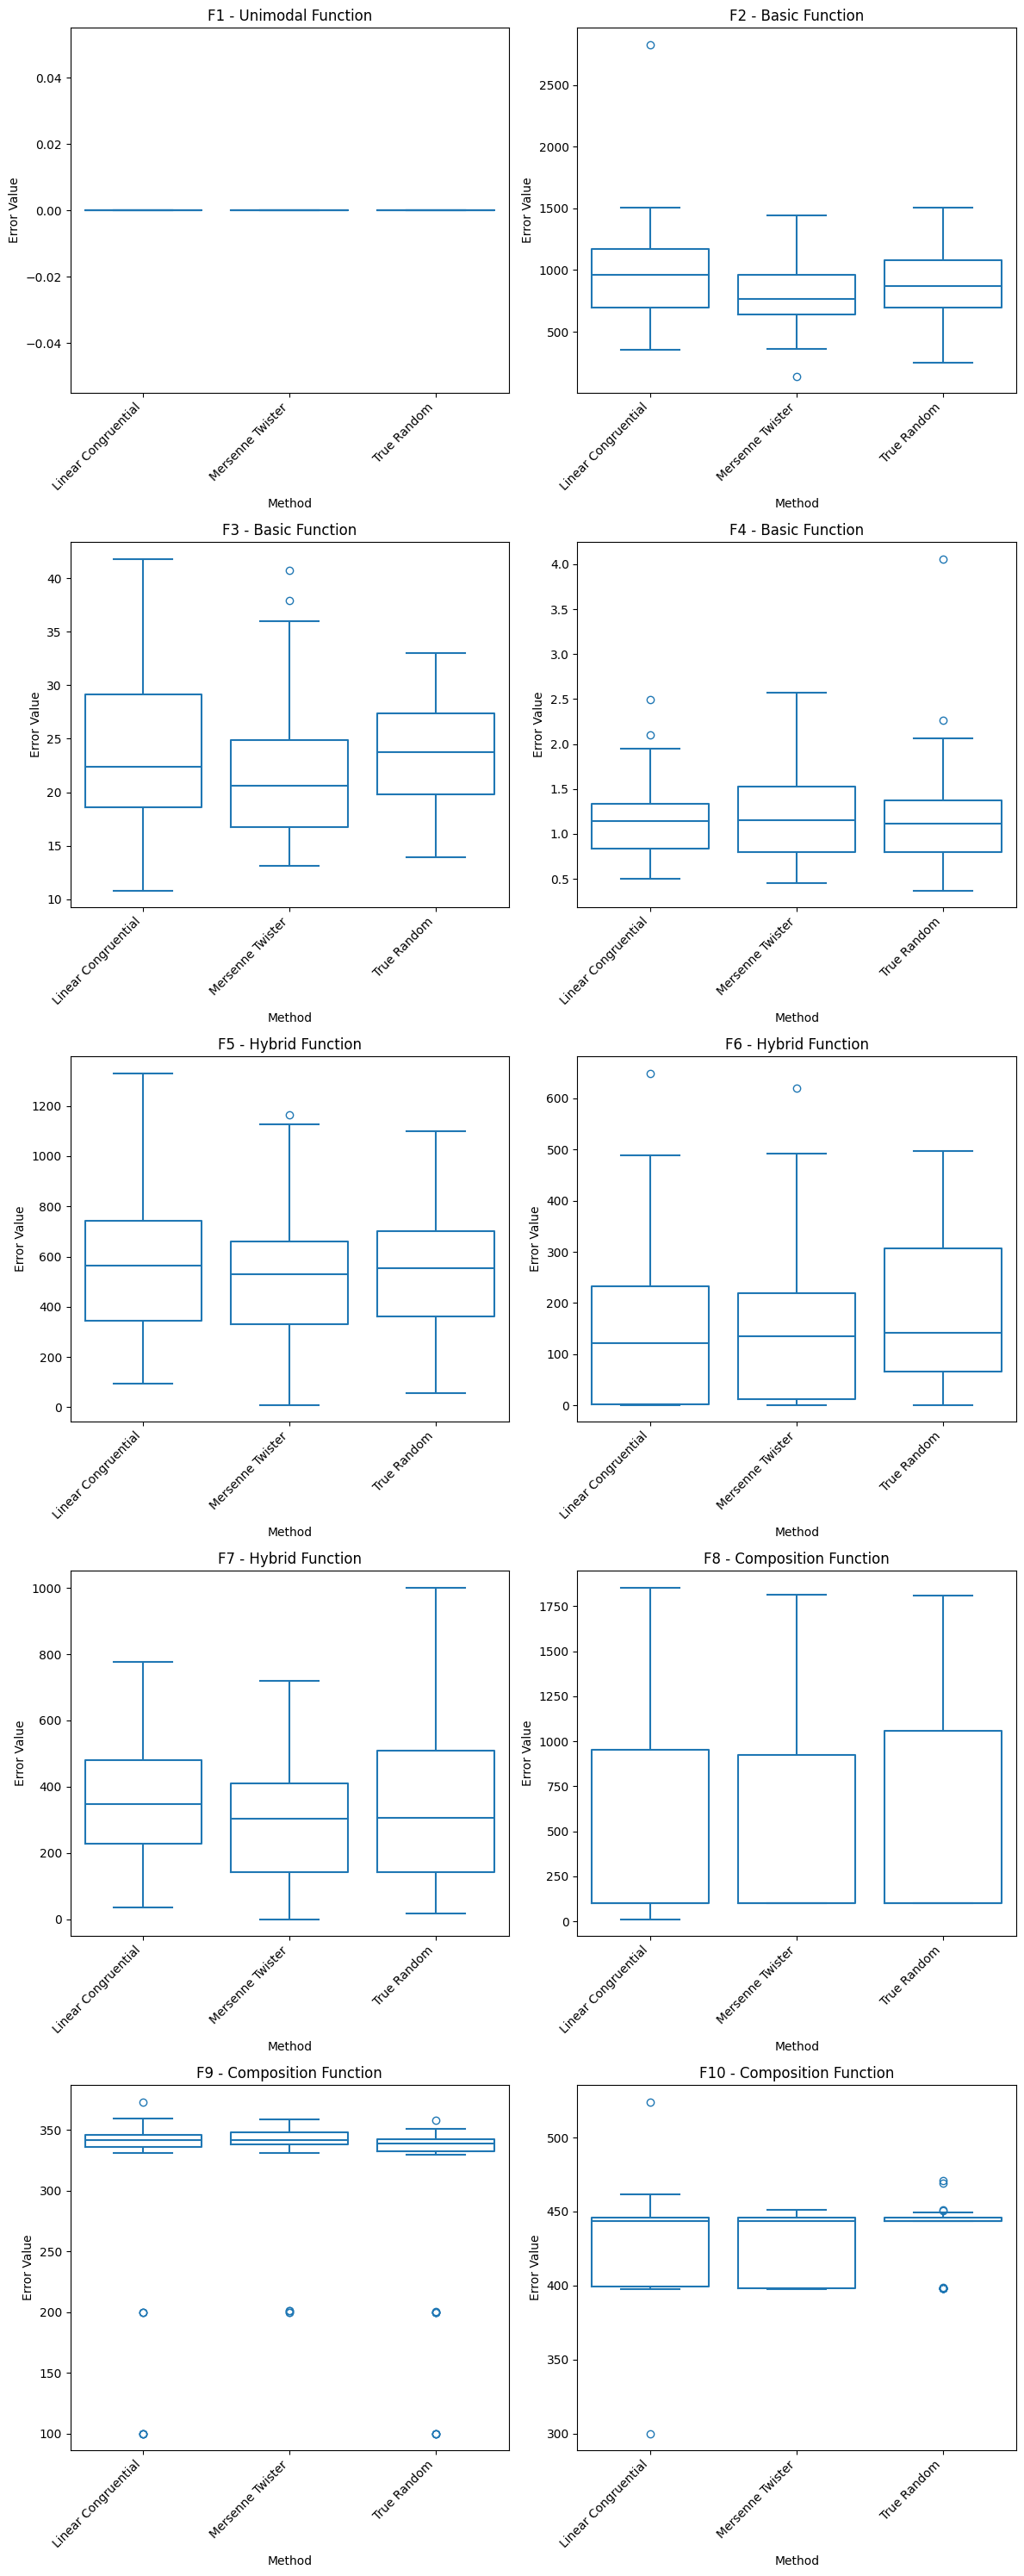

In [6]:
combined_df = pd.concat([lcg_df, mt_df, true_df], ignore_index=True)
plt.figure(figsize=(12, 30))

for i, function in enumerate(FUNCTIONS.keys()):
    plt.subplot(5, 2, i + 1)
    data = combined_df[combined_df['Function'] == function]
    sns.boxplot(data=data, x='Method', y='Error', fill=False)

    plt.title(f'F{function} - {FUNCTIONS[function]["Description"]}')
    plt.xlabel('Method')
    plt.ylabel('Error Value')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../imgs/box_cmaes.png', dpi=300, bbox_inches='tight')
plt.show()

### Wilcoxon signed-rank test

In [7]:
lcg_errors = [np.array(lcg_df[lcg_df['Function'] == i]['ErrorValue'].tolist()) for i in range(1, 11)]
mt_errors = [np.array(mt_df[mt_df['Function'] == i]['ErrorValue'].tolist()) for i in range(1, 11)]
true_errors = [np.array(true_df[true_df['Function'] == i]['ErrorValue'].tolist()) for i in range(1, 11)]

for i in range(1, 10):
    print(f"--- Function {i+1} ---")

    res = wilcoxon(true_errors[i], lcg_errors[i])
    print(f"\tTrue Random vs Linear Congruential: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(true_errors[i], mt_errors[i])
    print(f"\tTrue Random vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(lcg_errors[i], mt_errors[i])
    print(f"\tLinear Congruential vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}\n")

--- Function 2 ---
	True Random vs Linear Congruential: statistic = 531.00, p-value = 0.22
	True Random vs Mersenne-Twister: statistic = 504.00, p-value = 0.14
	Linear Congruential vs Mersenne-Twister: statistic = 453.00, p-value = 0.05

--- Function 3 ---
	True Random vs Linear Congruential: statistic = 654.00, p-value = 0.93
	True Random vs Mersenne-Twister: statistic = 500.00, p-value = 0.13
	Linear Congruential vs Mersenne-Twister: statistic = 494.00, p-value = 0.11

--- Function 4 ---
	True Random vs Linear Congruential: statistic = 643.50, p-value = 0.85
	True Random vs Mersenne-Twister: statistic = 588.50, p-value = 0.64
	Linear Congruential vs Mersenne-Twister: statistic = 600.00, p-value = 0.55

--- Function 5 ---
	True Random vs Linear Congruential: statistic = 639.00, p-value = 0.82
	True Random vs Mersenne-Twister: statistic = 573.00, p-value = 0.40
	Linear Congruential vs Mersenne-Twister: statistic = 546.00, p-value = 0.27

--- Function 6 ---
	True Random vs Linear Congru